In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np 
import os 
import pandas as pd 
import math
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype



There are 2 csv files in the current version of the dataset:


In [4]:
print(os.listdir('CXR8'))

['AAA NIH Postdoctoral Fellowship Opportunity!!! - Multi-Modal AI and Foundation Models for Precision Medicine.pdf', 'AAA Physician AI Research Opportunity!!!.pdf', 'ARXIV_V5_CHESTXRAY.pdf', 'BBox_List_2017.csv', 'Data_Entry_2017_v2020.csv', 'FAQ_CHESTXRAY.pdf', 'images', 'LOG_CHESTXRAY.pdf', 'LongTailCXR', 'MAPLEZ - Improved labels for the CXR8 dataset extracted with LLM', 'PruneCXR', 'README_CHESTXRAY.pdf', 'test_list.txt', 'train_val_list.txt']


In [5]:
def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
   
    nunique = df.nunique()
    cols = [col for col in df.columns if 1 < nunique[col] < 50]
    if len(cols) == 0:
        print("No columns with 2..49 unique values to plot.")
        return

    df_sel = df[cols]
    nCol = len(df_sel.columns)
    nGraphShown = min(nGraphShown, nCol)

    nGraphRow = math.ceil(nGraphShown / nGraphPerRow)

    plt.figure(figsize=(6 * nGraphPerRow, 4 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(nGraphShown):
        ax = plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnName = df_sel.columns[i]
        columnDf = df_sel.iloc[:, i]

        if is_numeric_dtype(columnDf.dtype):
            columnDf.hist(ax=ax)
        else:
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(ax=ax)

        ax.set_ylabel('counts')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'{columnName} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [6]:
def plotCorrelationMatrix(df, graphWidth=8):
    
    filename = getattr(df, "dataframeName", "DataFrame")

    df = df.dropna(axis='columns', how='all')

    cols = [col for col in df.columns if df[col].nunique() > 1]
    df = df[cols]

    numeric_df = df.select_dtypes(include=[np.number])

    if numeric_df.shape[1] < 2:
        print(f'No correlation plots shown: need at least 2 numeric non-constant columns (found {numeric_df.shape[1]})')
        return

    corr = numeric_df.corr()

    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    im = plt.imshow(corr, vmin=-1, vmax=1)  
    plt.colorbar(im, fraction=0.046, pad=0.04)

    cols = corr.columns.tolist()
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.yticks(range(len(cols)), cols)

    plt.gca().xaxis.tick_bottom()
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.tight_layout()
    plt.show()

In [7]:
def plotScatterMatrix(df, plotSize=12, textSize=10):
    df = df.select_dtypes(include=[np.number])

    df = df.dropna(axis='columns', how='all')

    df = df[[col for col in df if df[col].nunique() > 1]]

    columnNames = list(df.columns)
    if len(columnNames) > 10:  
        columnNames = columnNames[:10]
    df = df[columnNames]

    if df.shape[1] < 2:
        print("Need at least 2 numeric non-constant columns to plot.")
        return

    ax = pd.plotting.scatter_matrix(
        df,
        alpha=0.75,
        figsize=(plotSize, plotSize),
        diagonal='kde'
    )

    corrs = df.corr().values
    for i in range(len(corrs)):
        for j in range(i+1, len(corrs)):
            ax[i, j].annotate(
                f"r={corrs[i,j]:.2f}",
                (0.8, 0.2),
                xycoords='axes fraction',
                ha='center',
                va='center',
                fontsize=textSize,
                color="red"
            )

    plt.suptitle("Scatter and Density Plot", fontsize=textSize+2)
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### BBox_List_2017.csv

In [8]:
nRowsRead = 1000 
df1 = pd.read_csv('CXR8/BBox_List_2017.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'BBox_List_2017.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 984 rows and 9 columns


Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Index    984 non-null    object 
 1   Finding Label  984 non-null    object 
 2   Bbox [x        984 non-null    float64
 3   y              984 non-null    float64
 4   w              984 non-null    float64
 5   h]             984 non-null    float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 69.3+ KB


Distribution graphs (histogram/bar graph) of sampled columns:

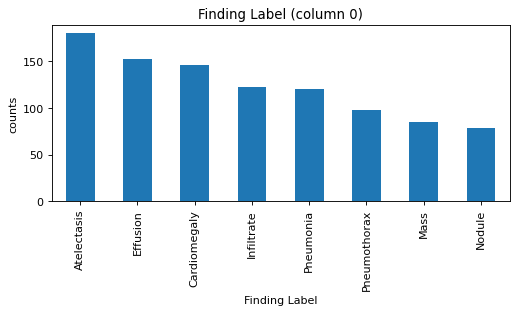

In [10]:

plotPerColumnDistribution(df1,10, 5)

Correlation matrix:

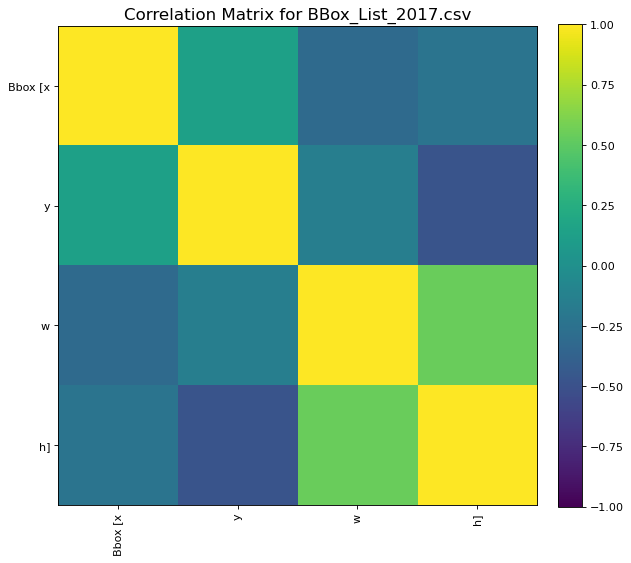

In [11]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

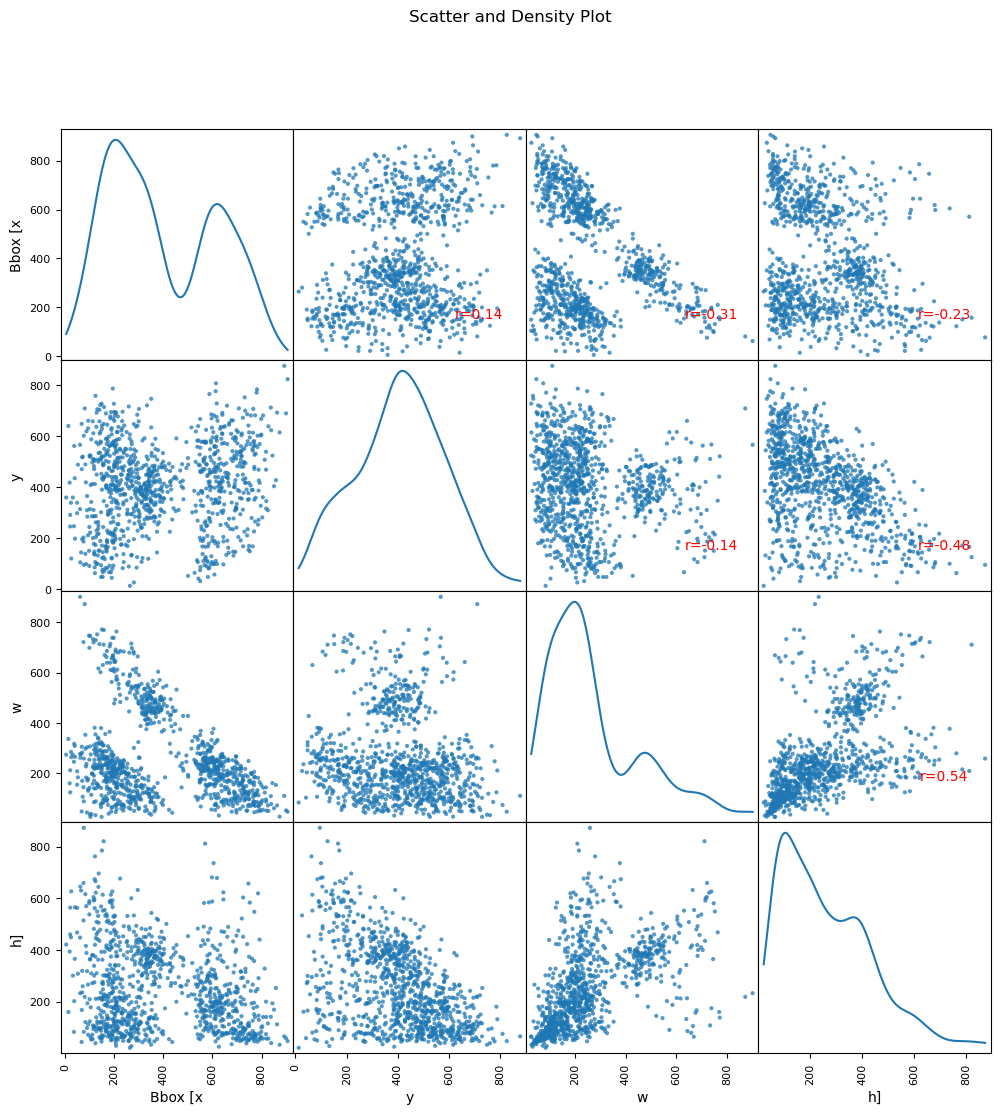

In [12]:
plotScatterMatrix(df1, 12, 10)

### Data_Entry_2017.csv

In [13]:
nRowsRead = 1000 
df2 = pd.read_csv('CXR8/Data_Entry_2017_v2020.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Data_Entry_2017.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


Let's take a quick look at what the data looks like:

In [14]:
df2.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [19]:
df2.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  1000 non-null   object 
 1   Finding Labels               1000 non-null   object 
 2   Follow-up #                  1000 non-null   int64  
 3   Patient ID                   1000 non-null   int64  
 4   Patient Age                  1000 non-null   int64  
 5   Patient Sex                  1000 non-null   object 
 6   View Position                1000 non-null   object 
 7   OriginalImage[Width          1000 non-null   int64  
 8   Height]                      1000 non-null   int64  
 9   OriginalImagePixelSpacing[x  1000 non-null   float64
 10  y]                           1000 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


Distribution graphs (histogram/bar graph) of sampled columns:

C:\Users\Mahfouz\AppData\Local\Temp\ipykernel_15924\2580592046.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Mahfouz\AppData\Local\Temp\ipykernel_15924\2580592046.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


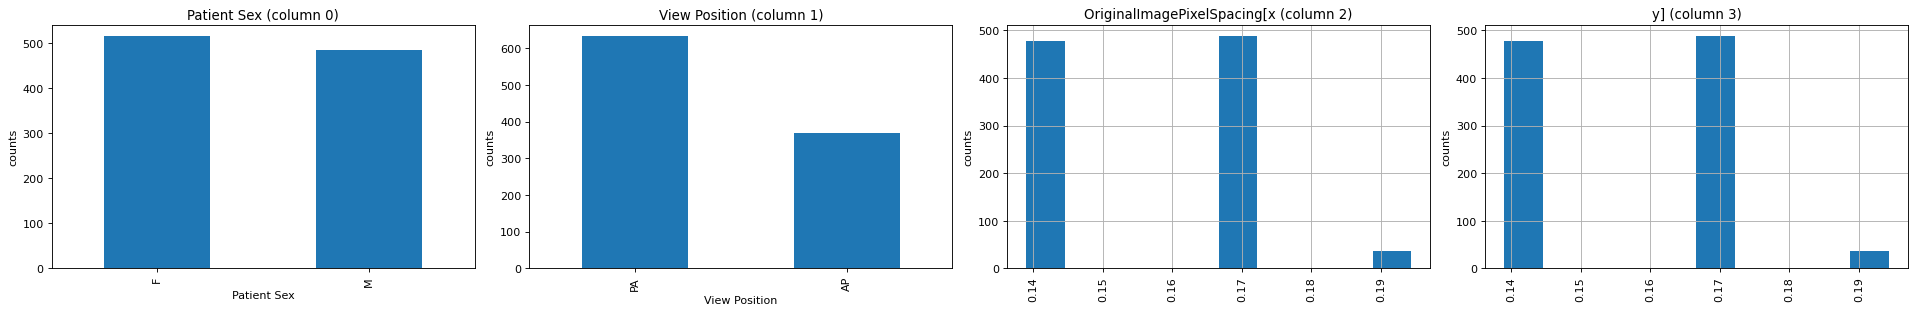

In [15]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

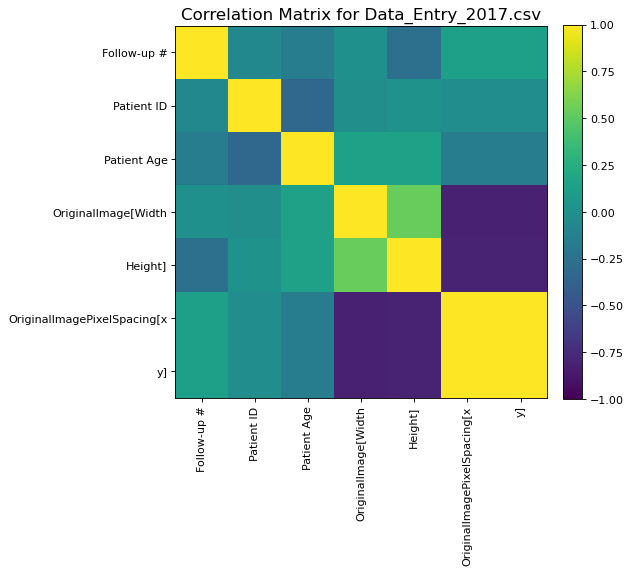

In [16]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

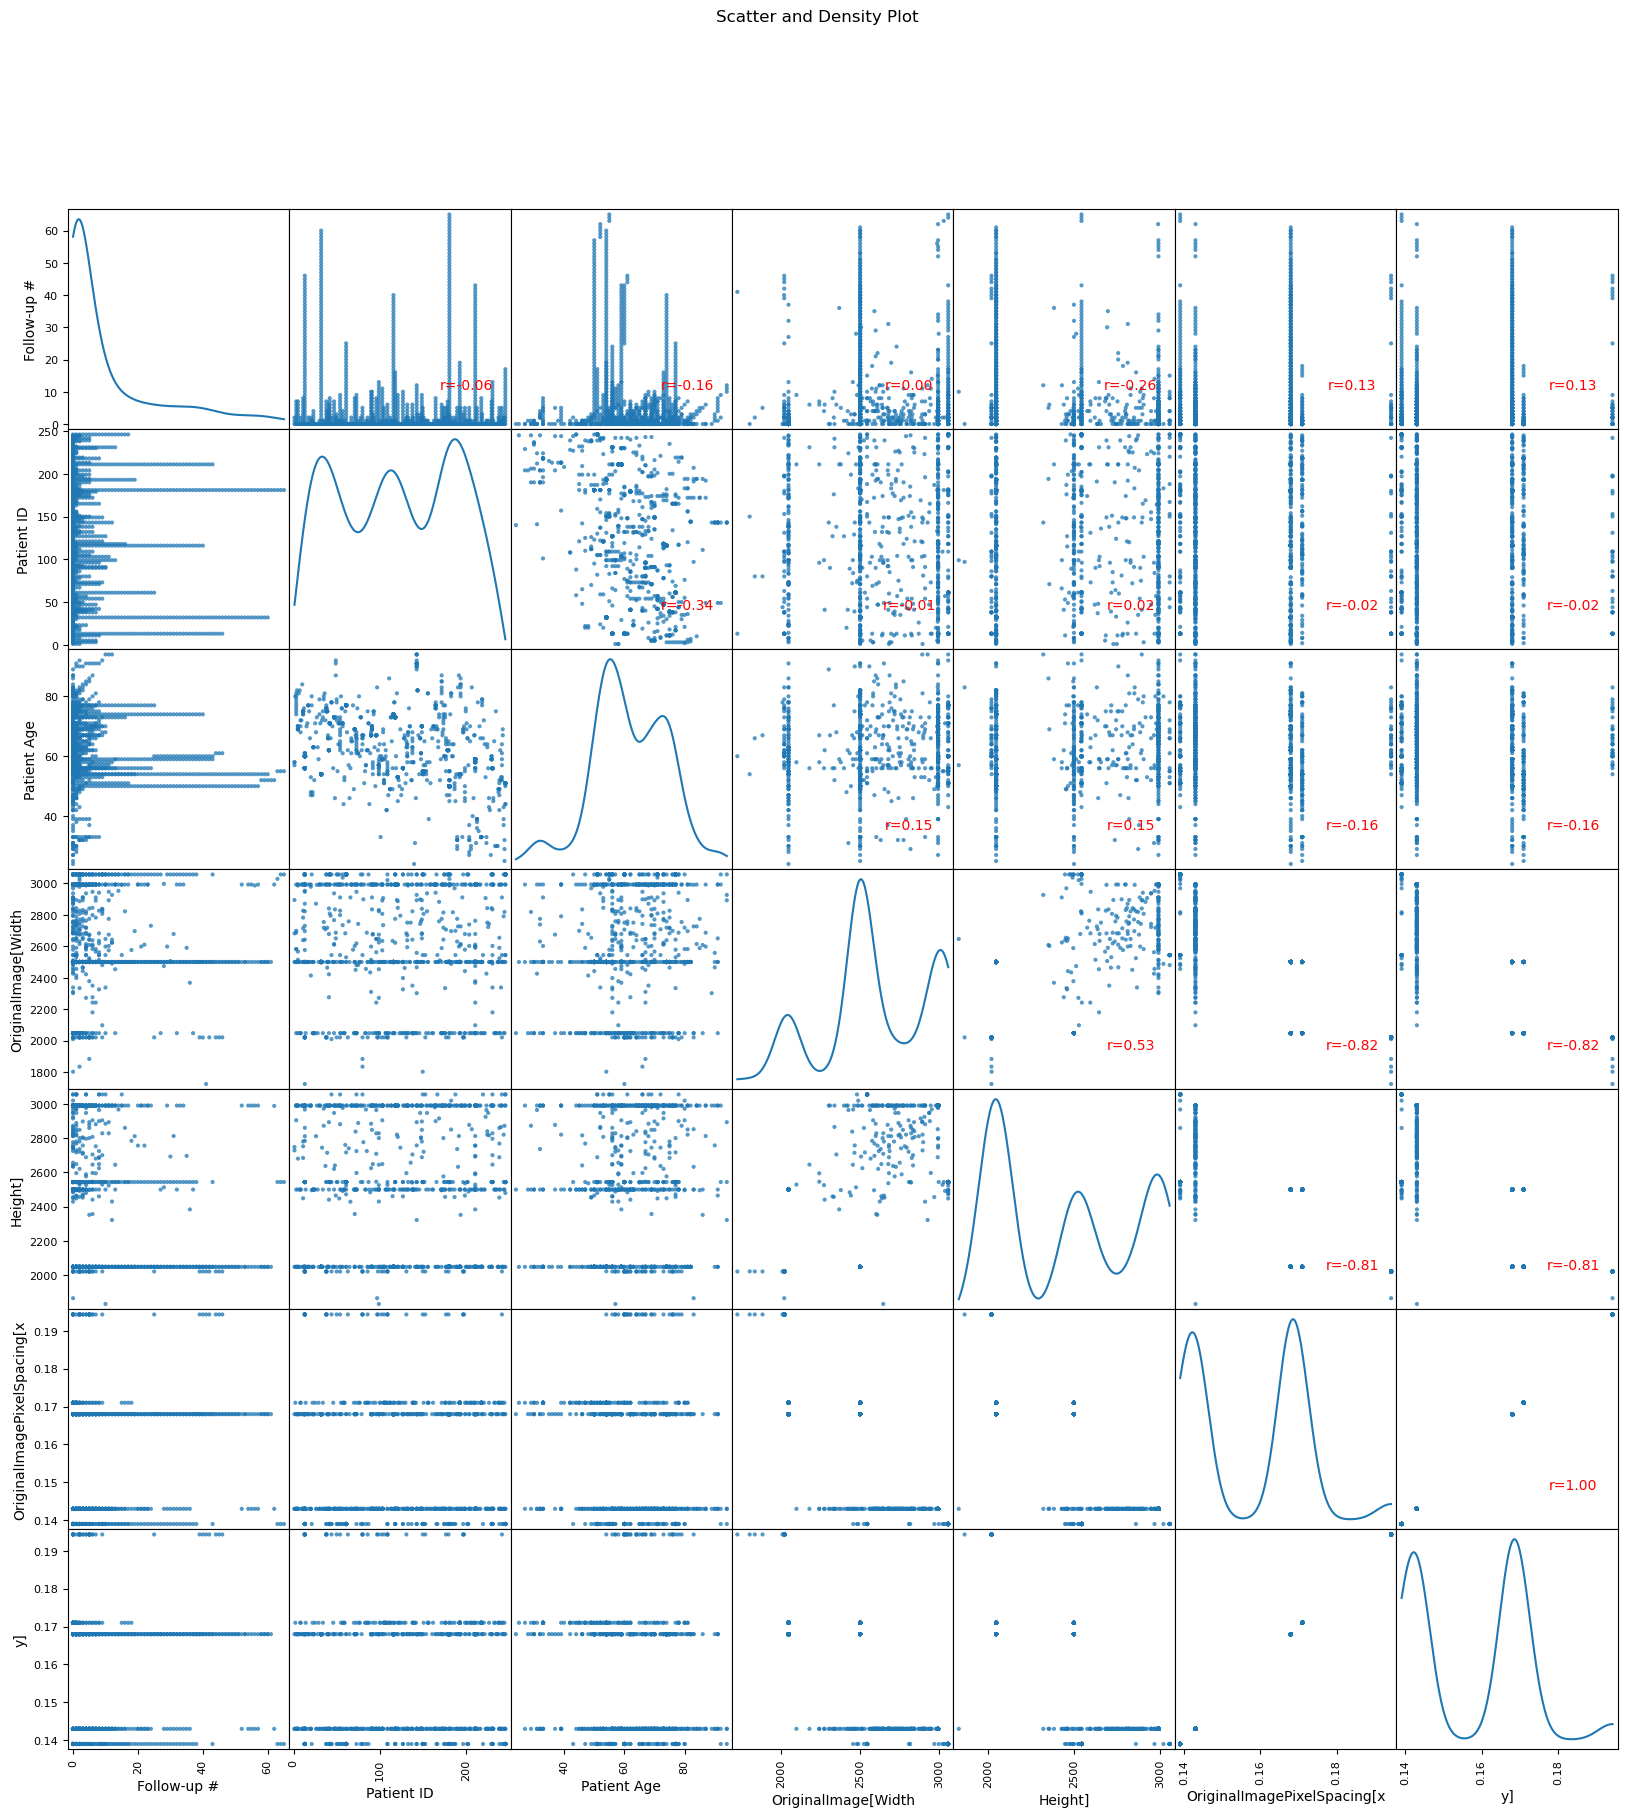

In [17]:
plotScatterMatrix(df2, 20, 10)